# Importing Modules

In [1]:
import import_ipynb
import CFAR as cfar
import GeoProcess as gp
import numpy as np

DATA_PATH = 'Dataset_963A/'

importing Jupyter notebook from CFAR.ipynb
importing Jupyter notebook from GeoProcess.ipynb


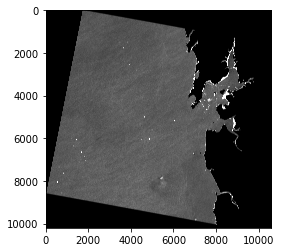

In [2]:
#Computing rows and columns
band_data_arr = gp.readGeoTiff(DATA_PATH+'LandMasked_Amplitude_VV.tif')
rows,col = band_data_arr.shape
#print(rows,col)
gp.visualizeImg(band_data_arr)

97.56479

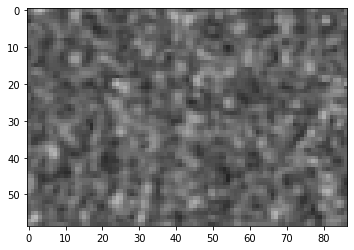

In [3]:
noise_subset_data = band_data_arr[2508:2567, 5645:5732]
noise_subset_data = np.array(noise_subset_data)
gp.visualizeImg(noise_subset_data)

noise_d = noise_subset_data.reshape(59*87,1)
noise = noise_d.mean()
noise

Image Saved Succesfully.


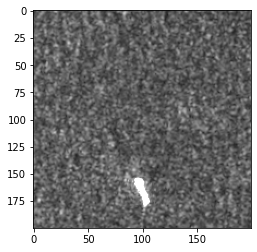

In [4]:
subset_img = gp.subsetImg(band_data_arr,5400,5600)
gp.visualizeImg(subset_img)
gp.save_img2Geotiff(subset_img,DATA_PATH+'CFARResults/Input.tif')

In [5]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
backgroundWindow_size = 5
targetWindow_size = 3
pfa = 0.999
sf = cfar.scaleFactor(pfa,backgroundWindow_size,targetWindow_size)
print(sf)

win = cfar.sliding_window(subset_img,backgroundWindow_size)

0.0010005316155137223


In [6]:
finalImg = []
for w in win:
    target,back = (cfar.get_TargetWindow(w,backgroundWindow_size,targetWindow_size))
    P = cfar.noisePower(back,backgroundWindow_size,targetWindow_size)
    #P = noise
    T = sf*P
    Dvi = cfar.DetectionVariable(target)
    if Dvi > T:
        finalImg.append(0)
    else:
        finalImg.append(1) #Valid Ships

In [7]:
finalImg = np.array(finalImg).reshape(subset_img.shape)
finalImg.shape

(200, 200)

Image Saved Succesfully.


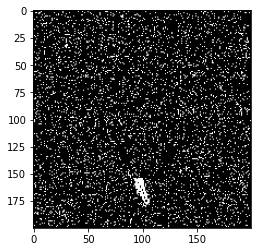

In [8]:
gp.visualizeBinaryImg(finalImg)
gp.save_img2Geotiff(finalImg,'Dataset_963A/CFARResults/Output.tif')